In [2]:
quantum_device = QuantumDevice("quantum_device")
device_compiler = SerialCompiler("Device compiler", quantum_device)

In [239]:
from quantify_scheduler import Schedule
from quantify_scheduler.resources import ClockResource
from quantify_scheduler.operations import pulse_library
from quantify_scheduler.operations.pulse_library import IdlePulse,RampPulse,GaussPulse,NumericalPulse
from quantify_scheduler.backends.graph_compilation import SerialCompiler
from quantify_scheduler.device_under_test.quantum_device import QuantumDevice
from scipy.signal.windows import gaussian

import numpy as np

sched = Schedule("Qubit Reset")

readout_clock = ClockResource(name="q0.ro", freq=0e9)
sched.add_resource(readout_clock)

# qc_offset = -10
# qc_duration = 0.06e-6
# cr_duration = 0.25e-6
# amp = duration / target_duration* offset
start = sched.add(IdlePulse(duration=4e-6))

# square_pulse = sched.add(
#     RampPulse(offset=qc_offset, amp=-qc_offset, duration=duration, port="flux", clock="q0.ro")
# )

# # sched.add(IdlePulse(duration=4e-9),ref_op = start,ref_pt="end",rel_time=0.05e-6)

# cr_offset = 10
# square_pulse = sched.add(
#     RampPulse(offset=cr_offset, amp=0, duration=cr_duration, port="flux", clock="q0.ro")
# )


# qfc_offset = -1
# qfc_duration = 200e-9
# square_pulse = sched.add(
#     RampPulse(offset=qfc_offset, amp=0, duration=qfc_duration, port="flux", clock="q0.ro")
# )

# target_duration = 100e-9
# target_amp = -qfc_duration / target_duration * qfc_offset

# square_pulse = sched.add(
#     RampPulse(offset=qfc_offset, amp=target_amp, duration=qfc_duration, port="flux", clock="q0.ro")
# )

# # sched.add(IdlePulse(duration=4e-9),ref_op = start,ref_pt="end",rel_time=0.05e-6)

# square_pulse = sched.add(
#     RampPulse(offset=cr_offset, amp=0, duration=cr_duration, port="flux", clock="q0.ro")
# )

# qc_duration = 0.01e-6
# square_pulse = sched.add(
#     RampPulse(offset=qc_offset, amp=0, duration=duration, port="flux", clock="q0.ro")
# )

# gaussian

# qcf_t = 14e-9
# qcf_amp = -0.076
# sched.add(
#     RampPulse(offset=qcf_amp, amp=0, duration=qcf_t, port="flux", clock="q0.ro")
# )

# crf_t = 360e-9
# crf_amp = 0.061

# sched.add(
#     RampPulse(offset=crf_amp, amp=0, duration=crf_t, port="flux", clock="q0.ro")
# )

# qcf_t = 25e-9
# qcf_amp = -0.044
# sched.add(
#     GaussPulse(duration = qcf_t, G_amp = qcf_amp, phase = 0, port = "flux", clock = "q0.ro",)
# )


# sched.add(
#     RampPulse(offset=crf_amp, amp=0, duration=crf_t, port="flux", clock="q0.ro")
# )

# qc_t = 20e-9
# qc_amp = -0.025
# sched.add(
#     GaussPulse(duration = qc_t,G_amp = qc_amp,phase = 0,port = "flux",clock = "q0.ro",)
# )

# cr_t = 190e-9
# cr_amp = 0.055
# sched.add(
#     RampPulse(offset=cr_amp, amp=0, duration=cr_t, port="flux", clock="q0.ro")
# )

# qc_t = 20e-9
# qc_amp = -0.025
# sched.add(
#     GaussPulse(duration = qc_t,G_amp = qc_amp,phase = 0,port = "flux",clock = "q0.ro",)
# )

qc_t = 20e-9
qc_amp = -0.025
target_duration = 100e-9
target_amp = qc_t / target_duration * qc_amp 

sched.add(
    RampPulse(offset=qc_amp, amp=-target_amp, duration=qc_t, port="flux", clock="q0.ro")
)
sched.add(
    RampPulse(offset=qc_amp, amp=-qc_amp, duration=qc_t, port="flux", clock="q0.ro")
)
sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)
sched.add(
    RampPulse(offset=0, amp=qc_amp, duration=qc_t, port="flux", clock="q0.ro")
)

comp_sched = device_compiler.compile(sched)
comp_sched.plot_pulse_diagram(plot_backend="plotly")



In [251]:
# step 1 ge/gf reset
sched = Schedule("Qubit Reset - Step 1 - ge/gf qc")

readout_clock = ClockResource(name="q0.ro", freq=0e9)
sched.add_resource(readout_clock)

# qc_offset = -10
# qc_duration = 0.06e-6
# cr_duration = 0.25e-6
# amp = duration / target_duration* offset
start = sched.add(IdlePulse(duration=4e-6))

qc_t = 20e-9
qc_amp = -0.025

sched.add(
    RampPulse(offset=qc_amp, amp=-qc_amp, duration=qc_t, port="flux", clock="q0.ro")
)

comp_sched = device_compiler.compile(sched)
comp_sched.plot_pulse_diagram(plot_backend="plotly")

In [252]:
# step 2

sched = Schedule("Qubit Reset - Step 2 - ge/gf cr")

readout_clock = ClockResource(name="q0.ro", freq=0e9)
sched.add_resource(readout_clock)

# qc_offset = -10
# qc_duration = 0.06e-6
# cr_duration = 0.25e-6
# amp = duration / target_duration* offset
start = sched.add(IdlePulse(duration=4e-6))

qc_t = 20e-9
qc_amp = -0.025

sched.add(
    RampPulse(offset=qc_amp, amp=-qc_amp, duration=qc_t, port="flux", clock="q0.ro")
)

# for e state
qc_t = 200e-9
qc_amp = 0.05

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)
# for f state
qc_t = 250e-9
qc_amp = 0.06

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)

qc_t = 20e-9
qc_amp = -0.025

sched.add(
    RampPulse(offset=qc_amp, amp=-qc_amp, duration=qc_t, port="flux", clock="q0.ro")
)

comp_sched = device_compiler.compile(sched)
comp_sched.plot_pulse_diagram(plot_backend="plotly")


In [255]:
# step 3

sched = Schedule("Qubit Reset - Step 3 - fg qc")

readout_clock = ClockResource(name="q0.ro", freq=0e9)
sched.add_resource(readout_clock)

# qc_offset = -10
# qc_duration = 0.06e-6
# cr_duration = 0.25e-6
# amp = duration / target_duration* offset
start = sched.add(IdlePulse(duration=4e-6))

qc_t = 20e-9
qc_amp = -0.025

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)


comp_sched = device_compiler.compile(sched)
comp_sched.plot_pulse_diagram(plot_backend="plotly")

In [257]:
# step 4

sched = Schedule("Qubit Reset - Step 4 - fg qc check")

readout_clock = ClockResource(name="q0.ro", freq=0e9)
sched.add_resource(readout_clock)

# qc_offset = -10
# qc_duration = 0.06e-6
# cr_duration = 0.25e-6
# amp = duration / target_duration* offset
start = sched.add(IdlePulse(duration=4e-6))

qc_t = 20e-9
qc_amp = -0.025

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)

# for f state
qc_t = 250e-9
qc_amp = 0.06

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)

qc_t = 20e-9
qc_amp = -0.025

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)

comp_sched = device_compiler.compile(sched)
comp_sched.plot_pulse_diagram(plot_backend="plotly")

In [262]:
# step 5

sched = Schedule("Qubit Reset - Step 5 - full")

readout_clock = ClockResource(name="q0.ro", freq=0e9)
sched.add_resource(readout_clock)

# qc_offset = -10
# qc_duration = 0.06e-6
# cr_duration = 0.25e-6
# amp = duration / target_duration* offset
start = sched.add(IdlePulse(duration=4e-6))


qc_t = 20e-9
qc_amp = -0.025

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)

qc_t = 250e-9
qc_amp = 0.06

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)

qc_t = 20e-9
qc_amp = -0.025

sched.add(
    RampPulse(offset=qc_amp, amp=-qc_amp, duration=qc_t, port="flux", clock="q0.ro")
)

# for e state
qc_t = 200e-9
qc_amp = 0.05

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)
# for f state
qc_t = 250e-9
qc_amp = 0.06

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)



comp_sched = device_compiler.compile(sched)
comp_sched.plot_pulse_diagram(plot_backend="plotly")

In [ ]:

# t = np.arange(0, 48.5e-9, 1e-9)


# gaussian_pulse = sched.add(
#     NumericalPulse(
#         samples=0.2 * gaussian(len(t), std=0.12 * len(t)),  # Numerical pulses can be complex as well.
#         t_samples=t,
#         port="flux",
#         clock="q0.ro",
#     ),
#     ref_pt="start",
#     rel_time=0e-9,
# )

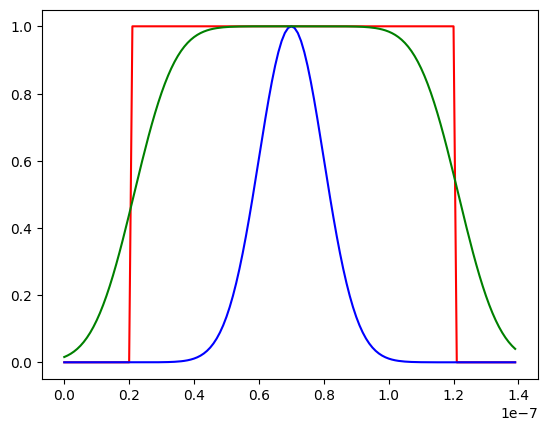

In [229]:
duration = 100
width = 10
space = 4
amp = 1
t_total = duration+space*width
tlist = np.arange(0,t_total,1)

# Square pulse of length L and unit amplitude centered at x+L/2
A = np.heaviside(tlist - space*width/2, 0) - np.heaviside(tlist - (duration+space*width/2), 0)

# Gaussian with mean (x+L/2) and std 1
f = np.exp(-pow(tlist-t_total/2,2)/(2*width**2))

g = np.convolve(A, f, mode = 'same') * amp  / np.sum(f)
plt.plot(tlist*1e-9, A, 'r')
plt.plot(tlist*1e-9, f, 'b')
plt.plot(tlist*1e-9, g, 'g')


In [228]:
t = 100
w =20
amp = 0.5
gauss = gaussian(w, std= 0.12*w)
square = [0]*w+[amp]*int(t)+[0]*w
gauss_square = np.convolve(gauss, square,mode = 'same') * dt / np.sum(f)
plt.plot(square)
plt.plot(gauss_square)

NameError: name 'dt' is not defined

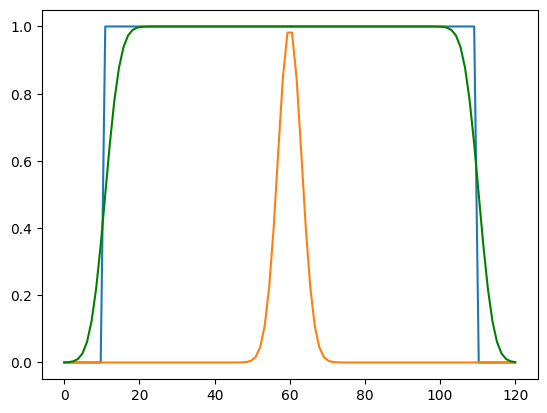